# Systems of Linear Algebraic Equations

Solve the simultaneous equations $$\mathbf{Ax}=\mathbf{b}$$

$$A_{11}x_1+A_{12}x_2+\cdots+A_{1n}x_n=b_1 \\ A_{21}x_1+A_{22}x_2+\cdots+A_{2n}x_n=b_2 \\ 
\vdots \\
A_{n1}x_1+A_{n2}x_2+\cdots+A_{nn}x_n=b_n$$

This can be written in matrix notation as

$$\left[ \begin{matrix}
A_{11} & A_{12} & \cdots & A_{1n} \\
A_{21} & A_{22} & \cdots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{n1} & A_{n2} & \cdots & A_{nn} \\
\end{matrix} \right] \left[ \begin{matrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n} \\
\end{matrix} \right] = \left[ \begin{matrix}
b_{1} \\
b_{2} \\
\vdots \\
b_{n} \\
\end{matrix} \right]$$

## Uniqueness (nonsingular)
To solve this system of equations, we must first prove there is uniqueness of solution (meaning the matrix is nonsingular). A matrix is singular (or ill conditioned) if there are linear dependencies i.e one row is a simple multiple of another row.

A test for singularity would be if the determinant $|\mathbf{A}|$ is small. But small relative to what. That reference is called the matrix norm $||\mathbf{A}||$, therefore the matrix is singular if 

$$|\mathbf{A}|<<||\mathbf{A}||$$

Condition is another way to find this at it is defined as

$$cond(\mathbf{A})=||\mathbf{A}||\cdot||\mathbf{A}^-1||$$

If the condition number is close to one, the matrix is well conditioned. As the conditioning number increases the degree of ill conditioning increases eventually reaching infinity as the matrix becomes singular.

## Examples

$$3x_1+2x_2 = 18\\
-x_1+2x_2 = 2$$

In [48]:
import numpy as np
import matplotlib.pyplot as plt
def f1(x): return (-3*x+18)/2
def f2(x): return (2+x)/2
x = np.arange(0,10,.01)

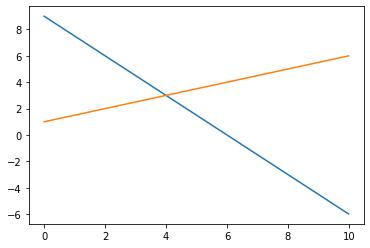

In [49]:
plt.plot(x,f1(x),x,f2(x))

### Building the matrix solution

In [50]:
A = np.matrix([[3.,2.],[-1.,2.]])
b = np.matrix([18,2])

#### Finding the determinant

In [51]:
np.linalg.det(A)

8.000000000000002

#### Finding the condition number

In [52]:
np.linalg.cond(A)

1.640388203202208

#### Finding the inverse solution

In [53]:
A.I*b.T

matrix([[4.],
        [3.]])

#### Using the linear algebra package in numpy

In [54]:
np.linalg.solve(A,b.T)

matrix([[4.],
        [3.]])

#### Using an explicit gaussian elimination routine function

In [55]:
'''x = gauss_elimin(a, b)
Solves [a][x] = [b] by Gauss elimination with no pivoting
'''
from numpy import dot, array

def gauss_elimin(a, b):
    (rows, cols) = a.shape
  # elimination phase
    for row in range(0, rows-1): # pivot equation/row
        for i in range(row+1, rows):
          if a[i, row] != 0.0:
            factor = a [i, row]/a[row, row]
            a[i, row+1:rows] = a[i, row+1:rows] - factor*a[row, row+1:rows]
            b[i] = b[i] - factor*b[row]
  # back substitution 
    for k in range(rows-1,-1,-1):
        b[k] = (b[k] - dot(a[k, k+1:rows],b[k+1:rows]))/a[k, k]
    return b


print (gauss_elimin(A, b.T))

[[4]
 [3]]


### Demonstration of ill-posed problems

In [56]:
def f1(x): return (-3*x+18)
def f2(x): return (-3*x+36)
x = np.arange(0,10,.01)

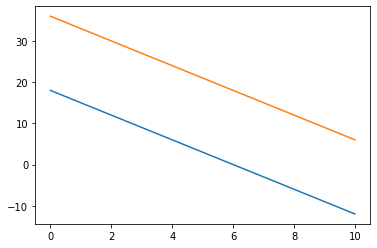

In [57]:
plt.plot(x,f1(x),x,f2(x))

In [58]:
A = np.matrix([[3,1],[3,1]])
b = np.matrix([[18,36]])

In [59]:
np.linalg.cond(A)

5.445162314622693e+16

In [60]:
np.linalg.det(A)

0.0

In [61]:
np.linalg.norm(A)

4.47213595499958

In [62]:
np.linalg.solve(A,b.T)

LinAlgError: Singular matrix

### Simple example of LU Decomposition

In [64]:
A = np.matrix([[8.,-6.,2.],[-4.,11.,-7.],[4.,-7.,6.]])
b = np.matrix([28.,-40.,33.])
A.I*b.T

matrix([[ 2.],
        [-1.],
        [ 3.]])

In [65]:
import scipy.linalg
P,L,U = scipy.linalg.lu(A)
print(L)
print(U)

[[ 1.   0.   0. ]
 [-0.5  1.   0. ]
 [ 0.5 -0.5  1. ]]
[[ 8. -6.  2.]
 [ 0.  8. -6.]
 [ 0.  0.  2.]]


In [66]:
scipy.multiply(L,U)

array([[ 8., -0.,  0.],
       [-0.,  8., -0.],
       [ 0., -0.,  2.]])

In [67]:
y = np.linalg.solve(L,b.T)

In [68]:
x = np.linalg.solve(U,y)
x

matrix([[ 2.],
        [-1.],
        [ 3.]])

## Real World Problem

### Staged seperation process

In a two-stage seperation process, we know the inlet flow rate (100bbl/d) and we know the compositional weight fraction of all of the streams. How can we use mass balance and matrices to calculate the flow rate of all the streams.

Inlet to stage one flow rate $F$ is 100bbl/d with compositions of $w_{C1}=0.2,w_{C2}=0.6,w_{C3}=0.2$

Light outlet to stage one flow rate is $x1$ with compositions of $w_{C1}=0.8,w_{C2}=0.2,w_{C3}=0.0$

Light outlet to stage two flow rate is $x2$ with compositions of $w_{C1}=0.05,w_{C2}=0.85,w_{C3}=0.1$

Heavy outlet to stage two flow rate is $x3$ with compositions of $w_{C1}=0.0,w_{C2}=0.2,w_{C3}=0.8$

![title](Fig1.png)

#### Make the balance equations

The flow in equals the totals of the flows out.

$$F = x1 + x2 + x3 = 100$$

The flow of each components in equals the flow of each components out.

$$0.2F = 0.8x1 + 0.05x2 + 0.0x3 = 20$$

$$0.6F = 0.2x1 + 0.85x2 + 0.2x3 = 60$$

#### Build the matrix

In [69]:
A = np.matrix([[1,1,1],[0.8,0.05,0.],[0.2,0.85,0.2]])
b = np.matrix([[100],[20],[60]])

#### Solve

In [70]:
np.linalg.solve(A,b)

matrix([[21.15384615],
        [61.53846154],
        [17.30769231]])

#### Answers

The flow rates are x1 = 21.15, x2 = 61.54, and x3 = 17.31

### Production Problem

The IPR curve from previous weeks of root finding is only half of the solution to production. We also need to solve for the pressure drop of the production tubing while it is flowing. Where these two function cross would be the actual production rate of the system.

Vogels empirical inflow performance relationship (IPR) is based on computer simulation results and is given by

$$\frac{q_o}{q_{o,max}}=1-0.2\left(\frac{p_{wf}}{\bar p_R}\right)-0.8\left(\frac{p_{wf}}{\bar p_R}\right)^2$$

$q_o$ is the oil flow rate in _STB/D_

$q_{o,max}$ is the maximum oil flow rate in _STB/D_

$p_{wf}$ is bottomhole pressure in _psia_

$\bar p_R$ is average reservoir pressure in _psia_

We will simplify this case so that it is linear by dropping the squared term. Therefore the approximate IPR is as follows:

$$\frac{q_o}{q_{o,max}}=1-0.2\left(\frac{p_{wf}}{\bar p_R}\right)$$

From last week's example, we already know $q_{o,max} = 844.5STB/D$ and $\bar p_R = 2300psi$

However, bottom hole pressure $p_{wf}$ is controlled by the hydrostatic pressure head $p_{hs}$ and the additional pressure drop $p_{\Delta p}$

If we assume the well is hydrostatic of $p_{hs}=500psi$ and the simplified function for the friction drop is 

$$p_{wf}=p_{hs}+p_{\Delta p} = 500+0.0001(1+2q_o)$$

#### Solve for the natural pressure drive flow rate $q_o$ and bottom hole pressure $p_{wf}$

In [71]:
def p(x): return 500+(.002*x)
def q(x): return ((1.-0.2*(x/2300.)))*844.5

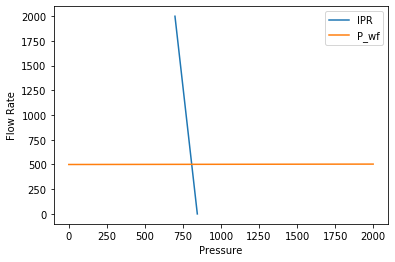

In [72]:
x = np.arange(0,2000,0.1)
labels = ['IPR','P_wf']
plt.plot(q(x),x, label='IPR')
plt.plot(x,p(x),label='P_wf')

plt.xlabel('Pressure')
plt.ylabel('Flow Rate')
plt.legend()

### Matrix setup

In [73]:
a = np.matrix([[.000087,.00118],[1,-2]])
b = np.matrix([[1],[501]])

### Solution

In [74]:
np.linalg.solve(a,b)

matrix([[1913.72230428],
        [ 706.36115214]])

In [79]:
def seidel(a,x,b):
    n = len(a)
    for j in range(0,n):
        d =b[j]
        for i in range (0,n):
            if (j !=i):
                d-=a[j][i]*x[i]
            x[j] = d/a[j][j]
    return x

In [80]:
a = [[4,1,2],[3,5,1],[1,1,3]]
b = [4,7,3]

In [81]:
x = [0,0,0] 

In [82]:
for i in range(0,25):
    x = seidel(a,x,b)
    print(x)

[1.0, 0.8, 0.39999999999999997]
[0.6000000000000001, 0.9599999999999997, 0.48000000000000004]
[0.52, 0.9919999999999998, 0.49600000000000005]
[0.504, 0.9983999999999998, 0.4992000000000001]
[0.5008, 0.99968, 0.49984]
[0.5001599999999999, 0.9999360000000002, 0.4999679999999999]
[0.500032, 0.9999872, 0.4999936]
[0.5000064, 0.9999974400000001, 0.49999871999999995]
[0.50000128, 0.999999488, 0.4999997439999999]
[0.500000256, 0.9999998976000001, 0.49999994880000004]
[0.5000000512, 0.9999999795199999, 0.4999999897600001]
[0.50000001024, 0.999999995904, 0.499999997952]
[0.500000002048, 0.9999999991808, 0.49999999959040003]
[0.5000000004095999, 0.9999999998361601, 0.49999999991808003]
[0.50000000008192, 0.9999999999672321, 0.49999999998361594]
[0.500000000016384, 0.9999999999934465, 0.49999999999672307]
[0.5000000000032768, 0.9999999999986894, 0.4999999999993445]
[0.5000000000006554, 0.9999999999997378, 0.49999999999986894]
[0.500000000000131, 0.9999999999999478, 0.49999999999997374]
[0.5000000